In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=22)
plt.rcParams["figure.figsize"] = (12, 8)
import warnings

In [ ]:
def loadEventSummary(filenames):
    n_truth_vtxs = []
    n_reco_vtxs  = []
    
    all_reco_vtxs = np.empty(7)
    for filename in filenames:
        with open(filename, 'r') as fp:
            n_truth_vtx, n_reco_vtx = [int(i) for i in fp.readline().split()]
            n_truth_vtxs.append(n_truth_vtx)            
            n_reco_vtxs.append(n_reco_vtx)            
            
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            vtxs_in_event = np.loadtxt(filename, skiprows=1)
            # print(vtxs_in_event)
            # print(vtxs_in_event)
            # print(vtxs_in_event.shape)
            # if len(vtxs_in_event) == 7:
            all_reco_vtxs = np.vstack((all_reco_vtxs, vtxs_in_event))

    return np.array(n_truth_vtxs), np.array(n_reco_vtxs), all_reco_vtxs

In [2]:
AMVFfiles = np.sort(glob.glob('output/*AMVF.txt'))
iterativefiles = np.sort(glob.glob('output/*iterative.txt'))

AMVF_vtxs = np.loadtxt(AMVFfiles[0])
iterative_vtxs = np.loadtxt(iterativefiles[0])

for AMVFfile in AMVFfiles[1:]:
    # print(AMVFfile)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        vtxs_in_event = np.loadtxt(AMVFfile)
        # print(vtxs_in_event.shape, vtxs_in_event)
        if len(vtxs_in_event) == 5:
            
            AMVF_vtxs = np.vstack((AMVF_vtxs, vtxs_in_event))
    # vtxs_in_event = np.loadtxt(AMVFfile)
    # # print(vtxs_in_event)
    # AMVF_vtxs = np.vstack((AMVF_vtxs, vtxs_in_event))
    
for iterativefile in iterativefiles[1:]:
    # print(AMVFfile)
    vtxs_in_event = np.loadtxt(iterativefile)
    # print(vtxs_in_event)
    iterative_vtxs = np.vstack((iterative_vtxs, vtxs_in_event))

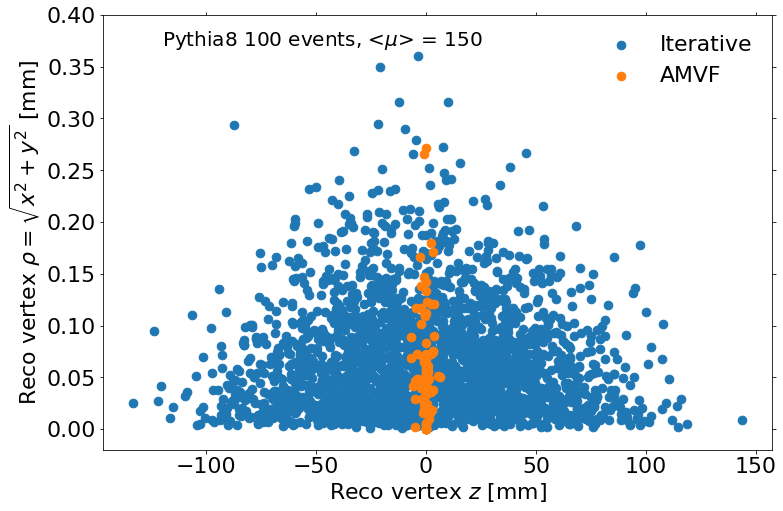

In [5]:
plt.scatter(iterative_vtxs[:,2], (iterative_vtxs[:,0]**2 + iterative_vtxs[:,1]**2)**0.5, s=75, label='Iterative')
plt.scatter(AMVF_vtxs[:,2], (AMVF_vtxs[:,0]**2 + AMVF_vtxs[:,1]**2)**0.5,                s=75, label='AMVF')

plt.text(-120, 0.37, "Pythia8 100 events, <$\\mu$> = 150", fontsize=20)

plt.xlabel('Reco vertex $z$ [mm]')
plt.ylabel('Reco vertex $\\rho=\\sqrt{x^2 + y^2}$ [mm]')
plt.ylim(-0.02, 0.4)

plt.legend(frameon=False)

Text(0, 0.5, 'Normalized # occurences')

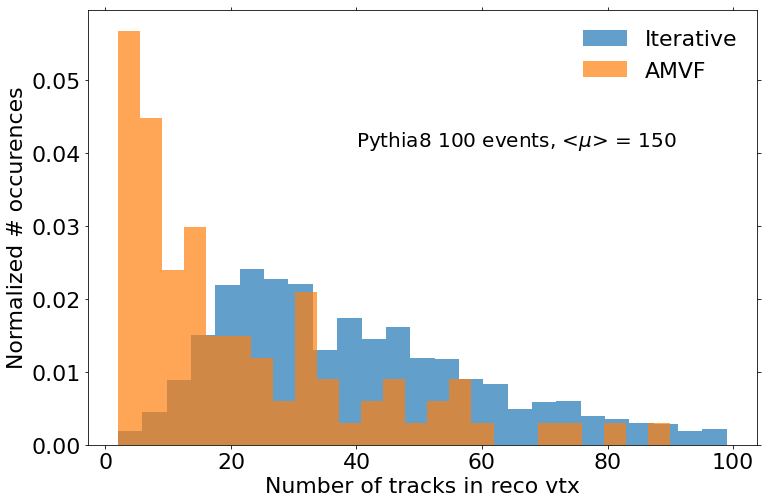

In [20]:
iterative_idx = iterative_vtxs[:,4] < 100
AMVF_idx =      AMVF_vtxs[:,4] < 100

plt.hist(iterative_vtxs[iterative_idx,4], density=True, bins=25, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[AMVF_idx,4], density=True,           bins=25, alpha=0.7, label='AMVF')

# plt.hist(iterative_vtxs[:,4], density=True, bins=20, alpha=0.7, label='Iterative')
# plt.hist(AMVF_vtxs[:,4], density=True,      bins=20, alpha=0.7, label='AMVF')


plt.text(40, 0.041, "Pythia8 100 events, <$\\mu$> = 150", fontsize=20)

plt.legend(frameon=False)
plt.xlabel('Number of tracks in reco vtx')
plt.ylabel('Normalized # occurences')

Text(0, 0.5, 'Normalized # occurences')

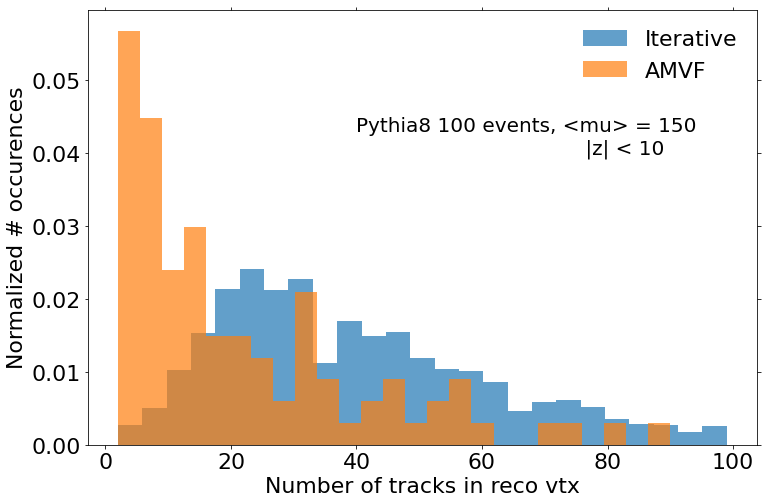

In [21]:
max_z = 10
iterative_idx = np.logical_and(iterative_vtxs[:,2] < max_z, iterative_vtxs[:,4] < 100)
AMVF_idx =      np.logical_and(AMVF_vtxs[:,2] < max_z, AMVF_vtxs[:,4] < 100)

plt.hist(iterative_vtxs[iterative_idx,4], density=True, bins=25, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[AMVF_idx,4], density=True,           bins=25, alpha=0.7, label='AMVF')

plt.text(40, 0.04, "Pythia8 100 events, <mu> = 150 \n                                    |z| < 10", fontsize=20)

plt.legend(frameon=False)
plt.xlabel('Number of tracks in reco vtx')
plt.ylabel('Normalized # occurences')

Text(0, 0.5, 'Normalized # occurences')

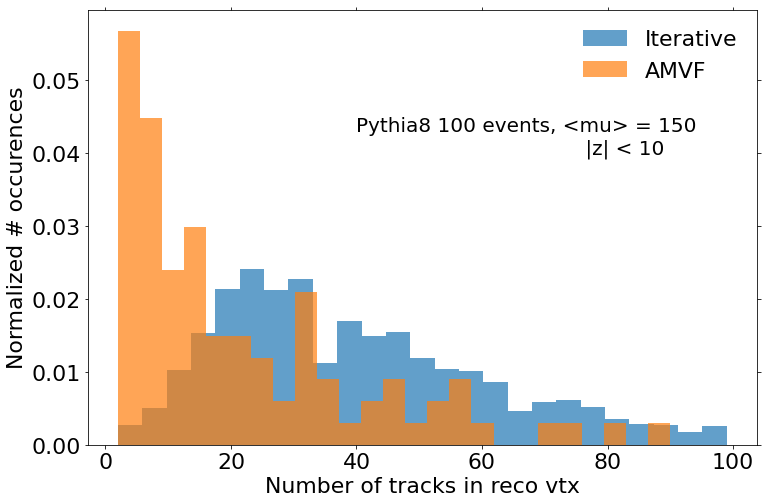

In [22]:
plt.hist(iterative_vtxs[iterative_idx,4], density=True, bins=25, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[AMVF_idx,4], density=True,           bins=25, alpha=0.7, label='AMVF')

plt.text(40, 0.04, "Pythia8 100 events, <mu> = 150 \n                                    |z| < 10", fontsize=20)

plt.legend(frameon=False)
plt.xlabel('Number of tracks in reco vtx')
plt.ylabel('Normalized # occurences')

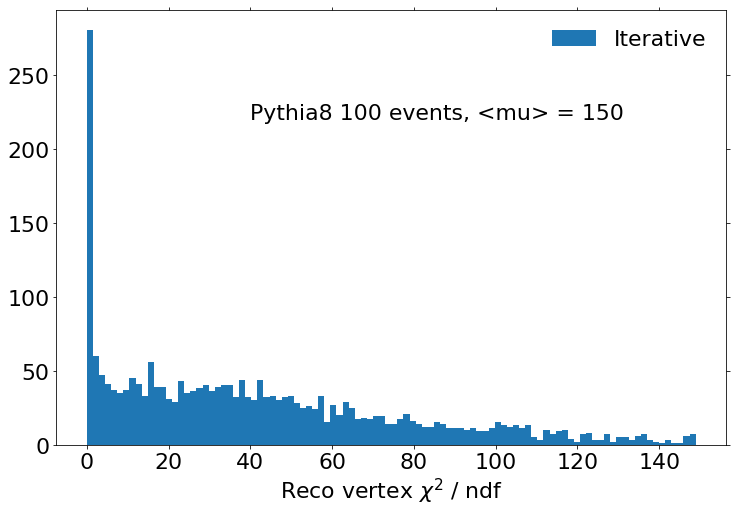

In [27]:
maxRedChi2 = 150
redchi2 = iterative_vtxs[:,5] / iterative_vtxs[:,6]

idx = redchi2 < maxRedChi2

_ = plt.hist(redchi2[idx], bins=100, label='Iterative')
plt.text(40, 220, "Pythia8 100 events, <mu> = 150", fontsize=22)

plt.xlabel('Reco vertex $\\chi^2$ / ndf')

plt.legend(frameon=False)

Text(0, 0.5, 'Normalized # occurences')

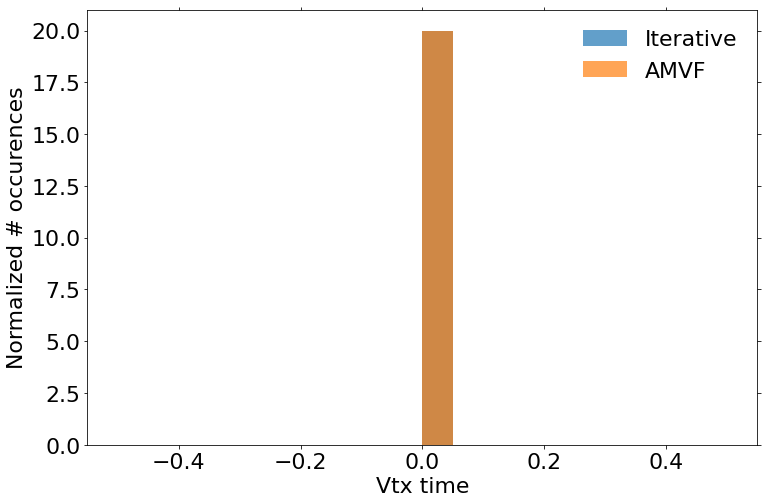

In [69]:
plt.hist(iterative_vtxs[:,3], density=True, bins=20, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[:,3], density=True,      bins=20, alpha=0.7, label='AMVF')

plt.legend(frameon=False)
plt.xlabel('Vtx time')
plt.ylabel('Normalized # occurences')